In [1]:
library(pacman)

# Use pacman to load the packages
p_load(car)
p_load(dplyr)
p_load(tidyverse, VIM, mice, Hmisc, 
               DMwR, naniar)
p_load(stargazer)
p_load(openxlsx)
p_load(here)
p_load(rio)
p_load(ggplot2)
p_load(BSDA)
p_load(corrplot)
p_load(caTools)
p_load(keras)
p_load(reticulate)
p_load(readr)
p_load(writexl)


In [2]:
library(caTools)

In [8]:
py_install("tensorflow")

+ "C:/Users/angme/anaconda3/condabin/conda.bat" "install" "--yes" "--prefix" "C:/Users/angme/anaconda3" "-c" "conda-forge" "tensorflow"



Import File

In [2]:
data = read.csv(here("dataSources", "videoGames", "video game sales titles - amc.csv"))
attach(data)

In [3]:
# Check the data
str(data)
summary(data)
names(data)
head(data, 5)

'data.frame':	7623 obs. of  23 variables:
 $ Rank          : int  2 3 5 7 8 10 13 18 19 23 ...
 $ Title         : chr  "Mario Kart 8 Deluxe" "Animal Crossing: New Horizons" "Counter-Strike: Global Offensive" "PLAYERUNKNOWN'S BATTLEGROUNDS" ...
 $ Console       : chr  "NS" "NS" "PC" "PC" ...
 $ Publisher     : chr  "Nintendo" "Nintendo" "Valve" "PUBG Corporation" ...
 $ Developer     : chr  "Nintendo EPD" "Nintendo" "Valve Corporation" "PUBG Corporation" ...
 $ Genre         : chr  "Racing" "Simulation" "Shooter" "Shooter" ...
 $ ReleaseYear   : int  2017 2020 2012 2017 2010 2018 2017 2017 2019 2011 ...
 $ ReleaseQuarter: int  2 1 3 4 4 3 1 4 4 2 ...
 $ ReleaseMonth  : int  4 3 8 12 10 7 3 10 11 5 ...
 $ ReleaseWeek   : int  17 12 34 51 41 28 9 43 46 21 ...
 $ ReleaseDay    : int  6 6 3 5 3 5 6 6 6 2 ...
 $ ReleaseWeekend: chr  "Weekend" "Weekend" "Weekday" "Weekday" ...
 $ EndOfMonth    : chr  "End of month" "End of month" "End of month" "End of month" ...
 $ TotalSales    : int  55460

      Rank          Title             Console           Publisher        
 Min.   :    2   Length:7623        Length:7623        Length:7623       
 1st Qu.: 5416   Class :character   Class :character   Class :character  
 Median :11084   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10574                                                           
 3rd Qu.:15858                                                           
 Max.   :19944                                                           
                                                                         
  Developer            Genre            ReleaseYear   ReleaseQuarter 
 Length:7623        Length:7623        Min.   :2010   Min.   :1.000  
 Class :character   Class :character   1st Qu.:2011   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :2013   Median :3.000  
                                       Mean   :2014   Mean   :2.558  
                                       3rd Qu.:2016   3rd 

[1] "Rank"           "Title"          "Console"        "Publisher"     
 [5] "Developer"      "Genre"          "ReleaseYear"    "ReleaseQuarter"
 [9] "ReleaseMonth"   "ReleaseWeek"    "ReleaseDay"     "ReleaseWeekend"
[13] "EndOfMonth"     "TotalSales"     "NASales"        "PALSales"      
[17] "JapanSales"     "OtherSales"     "ReleaseDate"    "LastUpdate"    
[21] "VGChartzScore"  "CriticScore"    "UserScore"

,Rank,Title,Console,Publisher,Developer,Genre,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,⋯,TotalSales,NASales,PALSales,JapanSales,OtherSales,ReleaseDate,LastUpdate,VGChartzScore,CriticScore,UserScore
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,Racing,2017,2,4,17,⋯,55460000,NA,NA,NA,NA,28/4/2017,11/19/2018,NA,9.3,NA
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,Simulation,2020,1,3,12,⋯,42790000,NA,NA,NA,NA,20/3/2020,4/11/2020,8.0,NA,NA
3,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,Shooter,2012,3,8,34,⋯,40000000,NA,NA,NA,NA,21/8/2012,3/26/2019,NA,NA,NA
4,7,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,Shooter,2017,4,12,51,⋯,36600000,NA,NA,NA,NA,21/12/2017,4/29/2019,NA,NA,NA
5,8,Minecraft,PC,Mojang,Mojang AB,Misc,2010,4,10,41,⋯,33150000,NA,NA,NA,NA,5/10/2010,8/5/2018,8.8,10.0,NA


In [4]:
########################################################
# data type
# set the variables to factors (categorical data)
data <- data %>%
  mutate(
    Console = as.factor(Console),
    Publisher = as.factor(Publisher),
    Developer = as.factor(Developer),
    Genre = as.factor(Genre),
    ReleaseWeekend = as.factor(ReleaseWeekend),
    EndOfMonth = as.factor(EndOfMonth),
    TotalSales = as.numeric(TotalSales)
  )

data ['NASales'] = NULL
data ['PALSales'] = NULL
data ['JapanSales'] = NULL
data ['OtherSales'] = NULL
data ['ReleaseDate'] = NULL
data ['LastUpdate'] = NULL
data ['VGChartzScore'] = NULL
data ['CriticScore'] = NULL
data ['UserScore'] = NULL

In [6]:
########################################################
# Calculate YearlySales

# Calculate YearsSinceRelease
data$YearsSinceRelease <- 2023 - data$ReleaseYear

# Calculate YearlySales
data$YearlySales <- ifelse(data$YearsSinceRelease == 0, data$TotalSales, data$TotalSales / data$YearsSinceRelease)

In [13]:
head(data,5)

,Rank,Title,Console,Publisher,Developer,Genre,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,ReleaseDay,ReleaseWeekend,EndOfMonth,TotalSales,YearsSinceRelease,YearlySales
,<int>,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,Racing,2017,2,4,17,6,Weekend,End of month,55460000,6,9243333
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,Simulation,2020,1,3,12,6,Weekend,End of month,42790000,3,14263333
3,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,Shooter,2012,3,8,34,3,Weekday,End of month,40000000,11,3636364
4,7,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,Shooter,2017,4,12,51,5,Weekday,End of month,36600000,6,6100000
5,8,Minecraft,PC,Mojang,Mojang AB,Misc,2010,4,10,41,3,Weekday,Beginning of month,33150000,13,2550000


In [7]:
# Check for NA values in the YearlySales column
na_count <- sum(is.na(data$YearlySales))

# Check for NaN values in the YearlySales column
nan_count <- sum(is.nan(data$YearlySales))

# Check for Inf values in the YearlySales column
inf_count <- sum(is.infinite(data$YearlySales))

# Print the results
cat("Number of NA values in YearlySales:", na_count, "\n")
cat("Number of NaN values in YearlySales:", nan_count, "\n")
cat("Number of Inf values in YearlySales:", inf_count, "\n")

Number of NA values in YearlySales: 0 
Number of NaN values in YearlySales: 0 
Number of Inf values in YearlySales: 0 


In [8]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Noticed too many publishers (total 713 publishers) & developers (total 1564 developers)

Rank             Title           Console         Publisher 
             7623              4930                21               713 
        Developer             Genre       ReleaseYear    ReleaseQuarter 
             1564                13                14                 4 
     ReleaseMonth       ReleaseWeek        ReleaseDay    ReleaseWeekend 
               12                53                 7                 2 
       EndOfMonth        TotalSales YearsSinceRelease       YearlySales 
                2               500                14              1260

ANOVA test - Do Publisher & Developer have any significant impact on the sales revenue?
Note: Due to large amount of publishers & developers, we run one-way ANOVA test in order to minimize computing power required

In [9]:
########################################################
# Does Publisher have an impact on the yearly revenue?

#Pre-processing: change the '-' to '_' for TukeyHSD
# Replace hyphens with underscores in the "Publisher" column
data$Publisher <- gsub("-", "_", data$Publisher)

In [72]:
# Perform one-way ANOVA to identify significant publishers
anova.result_Publisher <- aov(YearlySales ~ Publisher, data = data)
summary(anova.result_Publisher)

# p-value is less than 0.05, reject the null hypothesis - Publisher has an impact on the revenue

              Df    Sum Sq   Mean Sq F value Pr(>F)    
Publisher    277 2.426e+14 8.760e+11   3.643 <2e-16 ***
Residuals   6944 1.670e+15 2.405e+11                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [24]:
# Apply the Tukey HSD test
tukey_result = TukeyHSD(anova.result_Publisher)

In [25]:
# Change Tukey HSD test result to data frame
tukey_df <- as.data.frame(tukey_result$Publisher)

In [26]:
# Create a new column for Publisher names
tukey_df$Publisher <- rownames(tukey_df)

In [27]:
# View the dataframe
head(tukey_df,5)
names(tukey_df)

,diff,lwr,upr,p adj,Publisher
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
17_Bit-11 bit studios,-52476.19,-2778713,2673761,1,17_Bit-11 bit studios
1C Company-11 bit studios,-58087.30,-1875579,1759404,1,1C Company-11 bit studios
2K Games-11 bit studios,17462.83,-1132020,1166945,1,2K Games-11 bit studios
2K Play-11 bit studios,-46436.66,-1371150,1278277,1,2K Play-11 bit studios
2K Sports-11 bit studios,44982.84,-1102679,1192645,1,2K Sports-11 bit studios


[1] "diff"      "lwr"       "upr"       "p adj"     "Publisher"

In [28]:
# filter for p value < 0.05
significant_tukey_df <- tukey_df %>%
  filter(`p adj` < 0.05)


In [29]:
# Split the "Publisher" column into two columns
significant_tukey_df <- significant_tukey_df %>%
  separate(Publisher, into = c("Publisher1", "Publisher2"), sep = "-", extra = "merge", remove = FALSE)


In [30]:
# Create a vector of all unique significant publishers
all_significant_publishers <- unique(significant_tukey_df$Publisher1)

# Remove NAs (if any)
all_significant_publishers <- all_significant_publishers[!is.na(all_significant_publishers)]
length (all_significant_publishers)

# Compare and replace data$Publisher with 'Others' if it's not in the list
data$Publisher <- ifelse(data$Publisher %in% all_significant_publishers, data$Publisher, 'Others')


[1] 375

In [31]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Reduce the number of unique Publisher to 376

Rank             Title           Console         Publisher 
             7623              4930                21               376 
        Developer             Genre       ReleaseYear    ReleaseQuarter 
             1564                13                14                 4 
     ReleaseMonth       ReleaseWeek        ReleaseDay    ReleaseWeekend 
               12                53                 7                 2 
       EndOfMonth        TotalSales       YearlySales YearsSinceRelease 
                2               500              1256                14

In [33]:
########################################################
# Try again using lower significance level

# filter for p value < 0.00025
significant_tukey_df <- tukey_df %>%
  filter(`p adj` < 0.00025)

# Split the "Publisher" column into two columns
significant_tukey_df <- significant_tukey_df %>%
  separate(Publisher, into = c("Publisher1", "Publisher2"), sep = "-", extra = "merge", remove = FALSE)


# Create a vector of all unique significant publishers
all_significant_publishers <- unique(significant_tukey_df$Publisher1)

# Remove NAs (if any)
all_significant_publishers <- all_significant_publishers[!is.na(all_significant_publishers)]
length (all_significant_publishers)

# Compare and replace data$Publisher with 'Others' if it's not in the list
data$Publisher <- ifelse(data$Publisher %in% all_significant_publishers, data$Publisher, 'Others')


[1] 292

In [34]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Reduce the number of unique Publisher to 293

Rank             Title           Console         Publisher 
             7623              4930                21               293 
        Developer             Genre       ReleaseYear    ReleaseQuarter 
             1564                13                14                 4 
     ReleaseMonth       ReleaseWeek        ReleaseDay    ReleaseWeekend 
               12                53                 7                 2 
       EndOfMonth        TotalSales       YearlySales YearsSinceRelease 
                2               500              1256                14

In [10]:
########################################################
# Does Developer have an impact on the yearly revenue?

#Pre-processing: change the '-' to '_' for TukeyHSD
# Replace hyphens with underscores in the "Developer" column
data$Developer <- gsub("-", "_", data$Developer)

In [36]:
# Perform one-way ANOVA to identify significant publishers
anova.result_Developer = aov(YearlySales ~ Developer,data=data)
summary(anova.result_Developer)

# p-value is less than 0.05, reject the null hypothesis - Developer has an impact on the revenue


              Df    Sum Sq   Mean Sq F value Pr(>F)    
Developer   1563 6.351e+14 4.063e+11   1.924 <2e-16 ***
Residuals   6059 1.280e+15 2.112e+11                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [37]:
# Apply the Tukey HSD test
tukey_result_Developer = TukeyHSD(anova.result_Developer)

In [38]:
# Change Tukey HSD test result to data frame
tukey_df_Developer <- as.data.frame(tukey_result_Developer$Developer)

# Create a new column for Developer names
tukey_df_Developer$Developer <- rownames(tukey_df_Developer)

In [39]:
# filter for p value < 0.00025
significant_tukey_df_Developer <- tukey_df_Developer %>%
  filter(`p adj` < 0.00025)

In [40]:
# Split the "Developer" column into two columns
significant_tukey_df_Developer <- significant_tukey_df_Developer %>%
  separate(Developer, into = c("Developer1", "Developer2"), sep = "-", extra = "merge", remove = FALSE)


# Create a vector of all unique significant developers
all_significant_developers <- unique(significant_tukey_df_Developer$Developer1)

# Remove NAs (if any)
all_significant_developers <- all_significant_developers[!is.na(all_significant_developers)]
length (all_significant_developers)

[1] 1032

In [41]:
# Compare and replace data$Developer with 'Others' if it's not in the list
data$Developer <- ifelse(data$Developer %in% all_significant_developers, data$Developer, 'Others')


In [42]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Reduce the number of unique Developer to 1032

Rank             Title           Console         Publisher 
             7623              4930                21               293 
        Developer             Genre       ReleaseYear    ReleaseQuarter 
             1033                13                14                 4 
     ReleaseMonth       ReleaseWeek        ReleaseDay    ReleaseWeekend 
               12                53                 7                 2 
       EndOfMonth        TotalSales       YearlySales YearsSinceRelease 
                2               500              1256                14

In [44]:
########################################################
###### Examine missing patterns

# Count the number of records where Status is "Unknown"
print( sum(data$Developer == "Unknown"))

[1] 401


In [ ]:
# Spotted 401 'Unknown' developer, which is the Top 1! Need to do data imputation
print (401/7623)
# 5.26% unknown

[1] 0.05260396


,Rank,Title,Console,Publisher,Genre,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,ReleaseDay,ReleaseWeekend,EndOfMonth,TotalSales,YearsSinceRelease,YearlySales,Developer,
7222,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
401,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,401,401


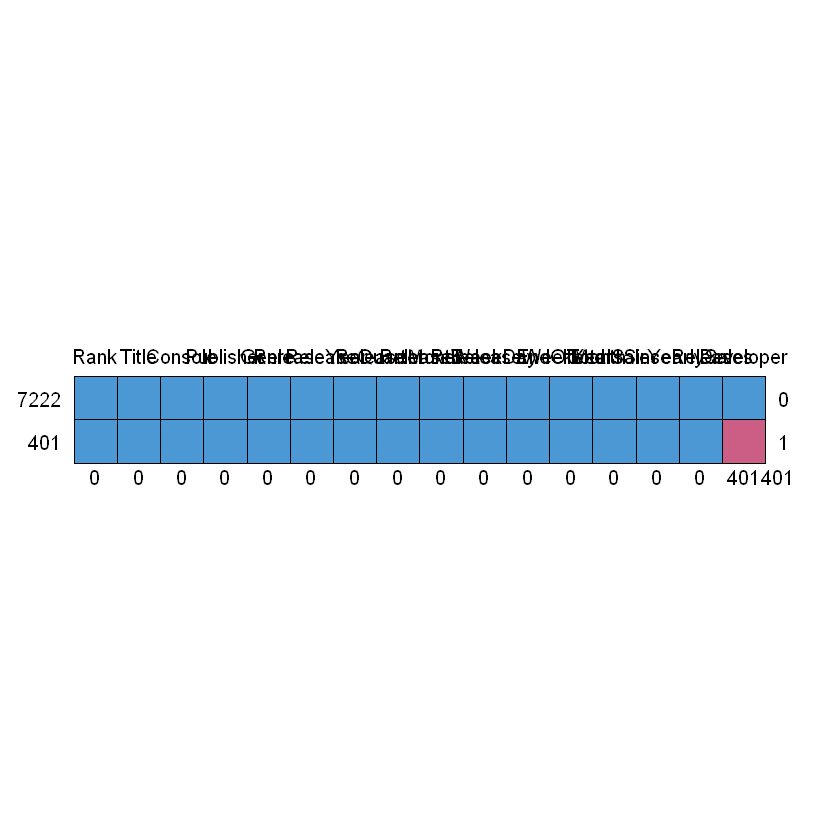

In [11]:
# Replace 'Unknown' with NA
data$Developer[data$Developer == 'Unknown'] <- NA

md.pattern(data)

In [ ]:
##### Little's Test #######
# Little's (1988) test statistic to assess if data is MCAR. 
# The null hypothesis (H0) : the data is MCAR

mcar_test(data)

In [12]:
# p-value is less than 0.05, reject null hypothesis = data is not missing at random; 
# hence we are unable to perform data imputation to prevent systematic error
# drop those records with Unknown Developer

data = na.omit(data)

In [13]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Data left with 7222 records

Rank             Title           Console         Publisher 
             7222              4613                21               674 
        Developer             Genre       ReleaseYear    ReleaseQuarter 
             1563                13                14                 4 
     ReleaseMonth       ReleaseWeek        ReleaseDay    ReleaseWeekend 
               12                53                 7                 2 
       EndOfMonth        TotalSales YearsSinceRelease       YearlySales 
                2               499                14              1246

Build LM model

Warning message:
"Use of `data$YearlySales` is discouraged.
ℹ Use `YearlySales` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


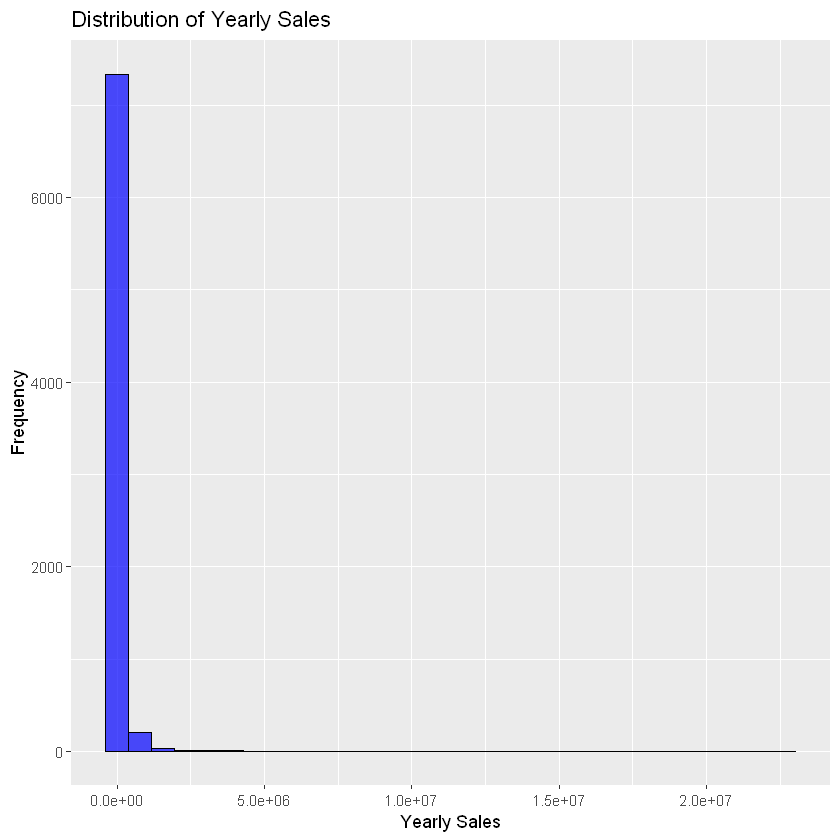

In [19]:
########################################################
# Check the distribution of dependent variable (TotalSales)

# Create a histogram using ggplot
ggplot(data, aes(x = data$YearlySales)) +
  geom_histogram(fill = "blue", color = "black", alpha = 0.7) +
  labs(
    title = "Distribution of Yearly Sales",
    x = "Yearly Sales",
    y = "Frequency"
  )

In [14]:
# Right-skewed: transform 'YearlySales' using log
data$log_transformed_yearly_sales <- log(data$YearlySales)

# Filter out infinite and missing values from the log-transformed variable
data <- data[is.finite(data$log_transformed_yearly_sales), ]

In [15]:
# Check for NA values in the log_transformed_yearly_sales column
na_count <- sum(is.na(data$log_transformed_yearly_sales))

# Check for NaN values in the log_transformed_yearly_sales column
nan_count <- sum(is.nan(data$log_transformed_yearly_sales))

# Check for Inf values in the log_transformed_yearly_sales column
inf_count <- sum(is.infinite(data$log_transformed_yearly_sales))

# Print the results
cat("Number of NA values in log_transformed_yearly_sales:", na_count, "\n")
cat("Number of NaN values in log_transformed_yearly_sales:", nan_count, "\n")
cat("Number of Inf values in log_transformed_yearly_sales:", inf_count, "\n")

Number of NA values in log_transformed_yearly_sales: 0 
Number of NaN values in log_transformed_yearly_sales: 0 
Number of Inf values in log_transformed_yearly_sales: 0 


In [16]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))


Rank                        Title 
                        7222                         4613 
                     Console                    Publisher 
                          21                          674 
                   Developer                        Genre 
                        1563                           13 
                 ReleaseYear               ReleaseQuarter 
                          14                            4 
                ReleaseMonth                  ReleaseWeek 
                          12                           53 
                  ReleaseDay               ReleaseWeekend 
                           7                            2 
                  EndOfMonth                   TotalSales 
                           2                          499 
           YearsSinceRelease                  YearlySales 
                          14                         1246 
log_transformed_yearly_sales 
                        1246

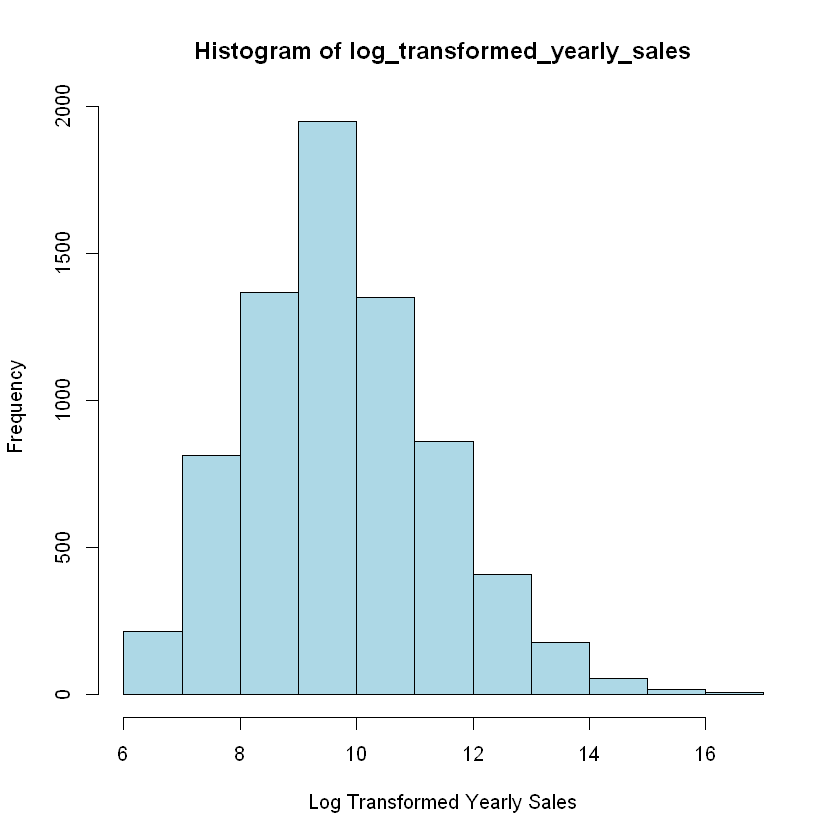

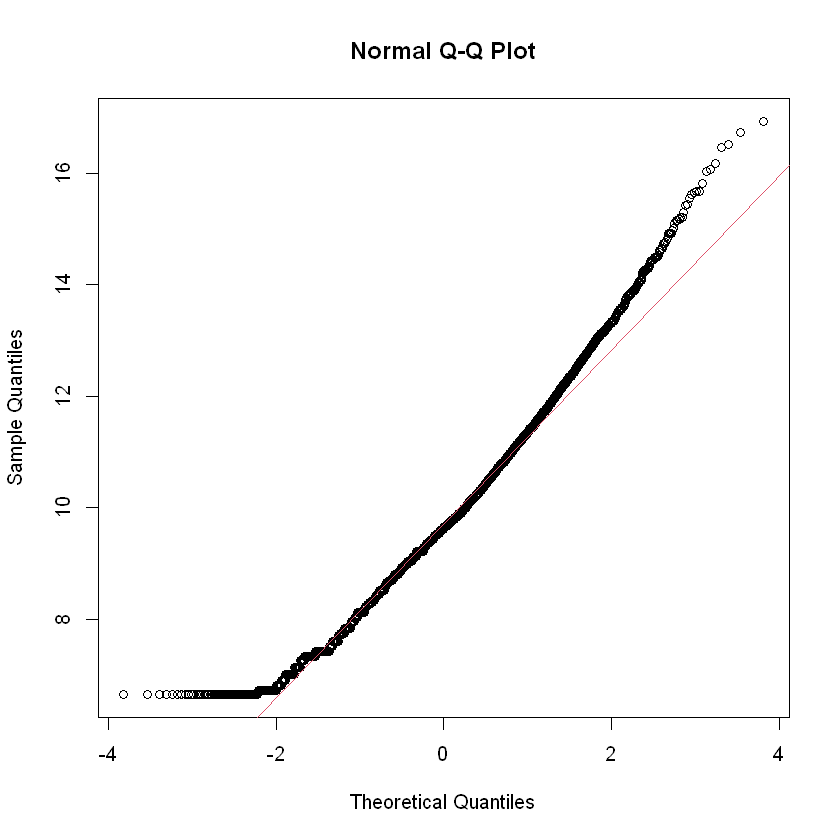

In [17]:
# Create a histogram for 'log_transformed_yearly_sales'
hist(data$log_transformed_yearly_sales, main="Histogram of log_transformed_yearly_sales", xlab="Log Transformed Yearly Sales", col="lightblue")

# Create a QQ plot for 'log_transformed_yearly_sales'
qqnorm(data$log_transformed_yearly_sales)
qqline(data$log_transformed_yearly_sales, col = 2)

# Display both the histogram and the QQ plot side by side
par(mfrow = c(1, 2))

In [18]:
########################################################
# Build LM model

lm_model1 = lm(log_transformed_yearly_sales ~ Console + Publisher + Genre + ReleaseQuarter + ReleaseWeekend, data = data)
summary(lm_model1)


Call:
lm(formula = log_transformed_yearly_sales ~ Console + Publisher + 
    Genre + ReleaseQuarter + ReleaseWeekend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0624 -0.6517  0.0000  0.6671  4.4762 

Coefficients: (1 not defined because of singularities)
                                                 Estimate Std. Error t value
(Intercept)                                      9.068905   0.605275  14.983
ConsoleAmig                                      2.298524   1.347257   1.706
ConsoleDS                                       -0.155680   0.078835  -1.975
ConsoleGBA                                       3.183771   1.209134   2.633
ConsoleiOS                                       1.481879   1.204462   1.230
ConsoleNS                                        0.884151   0.092046   9.606
ConsolePC                                        0.298490   0.076966   3.878
ConsolePS2                                      -0.474226   0.191950  -2.471
ConsolePS3               

In [19]:
# Set max.print to Infinity to ensure all coefficients are displayed
options(max.print = 9999999)

# Print the summary using stargazer
stargazer(lm_model1, type = "text", out = "summary_table.txt")


                                                    Dependent variable:     
                                                ----------------------------
                                                log_transformed_yearly_sales
----------------------------------------------------------------------------
ConsoleAmig                                                2.299*           
                                                          (1.347)           
                                                                            
ConsoleDS                                                 -0.156**          
                                                          (0.079)           
                                                                            
ConsoleGBA                                                3.184***          
                                                          (1.209)           
                                                                           

In [ ]:
# R2 is 51.04%; Adj R2 is 45.74%
# All X variables are significant as p-values are less than 0.05

In [20]:
########################################################
# Build LM model

lm_model2 = lm(log_transformed_yearly_sales ~ Console + Publisher + Genre + ReleaseMonth + ReleaseWeekend + EndOfMonth, data = data)
summary(lm_model2)


Call:
lm(formula = log_transformed_yearly_sales ~ Console + Publisher + 
    Genre + ReleaseMonth + ReleaseWeekend + EndOfMonth, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0742 -0.6503  0.0000  0.6681  4.4601 

Coefficients: (1 not defined because of singularities)
                                                 Estimate Std. Error t value
(Intercept)                                      9.094493   0.606048  15.006
ConsoleAmig                                      2.299427   1.347946   1.706
ConsoleDS                                       -0.157692   0.078865  -2.000
ConsoleGBA                                       3.181109   1.209557   2.630
ConsoleiOS                                       1.478257   1.205010   1.227
ConsoleNS                                        0.886238   0.092104   9.622
ConsolePC                                        0.299320   0.077014   3.887
ConsolePS2                                      -0.475888   0.192005  -2.479
ConsolePS3    

In [ ]:
# R2 is around the same as model 1 = 51.03%; Adj R2 is 45.71%
# All X variables are significant except for EndOfMonth

In [21]:
########################################################
# Build LM model

lm_model3 = lm(log_transformed_yearly_sales ~ Console + Publisher + Genre + ReleaseWeek + ReleaseDay + ReleaseWeekend, data = data)
summary(lm_model3)


Call:
lm(formula = log_transformed_yearly_sales ~ Console + Publisher + 
    Genre + ReleaseWeek + ReleaseDay + ReleaseWeekend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9304 -0.6478  0.0000  0.6646  4.4319 

Coefficients: (1 not defined because of singularities)
                                                  Estimate Std. Error t value
(Intercept)                                      9.4414152  0.6057605  15.586
ConsoleAmig                                      2.1624683  1.3434762   1.610
ConsoleDS                                       -0.1464750  0.0786012  -1.864
ConsoleGBA                                       3.3357587  1.2058732   2.766
ConsoleiOS                                       1.6894435  1.2013791   1.406
ConsoleNS                                        0.8826514  0.0917647   9.619
ConsolePC                                        0.3001837  0.0767524   3.911
ConsolePS2                                      -0.4408566  0.1914566  -2.303
Consol

In [ ]:
# R2 up slightly to 51.34%; Adj R2 is 46.06%
# All X variables are significant

In [22]:
########################################################
# Build LM model

lm_model4 = lm(log_transformed_yearly_sales ~ Console + Publisher + Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)
summary(lm_model4)


Call:
lm(formula = log_transformed_yearly_sales ~ Console + Publisher + 
    Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9266 -0.6474  0.0000  0.6642  4.4361 

Coefficients: (1 not defined because of singularities)
                                                  Estimate Std. Error t value
(Intercept)                                      9.4434100  0.6057568  15.589
ConsoleAmig                                      2.1524410  1.3434670   1.602
ConsoleDS                                       -0.1461572  0.0786092  -1.859
ConsoleGBA                                       3.3398937  1.2058655   2.770
ConsoleiOS                                       1.6891548  1.2014061   1.406
ConsoleNS                                        0.8824833  0.0917672   9.617
ConsolePC                                        0.3002465  0.0767554   3.912
ConsolePS2                                      -0.4406188  0.1914645  -2.301
Conso

In [23]:
########################################################
# Build LM model

lm_model5 = lm(log_transformed_yearly_sales~ Console + Developer + Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)
summary(lm_model5)


Call:
lm(formula = log_transformed_yearly_sales ~ Console + Developer + 
    Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5587 -0.5022  0.0000  0.5344  5.8400 

Coefficients: (2 not defined because of singularities)
                                                                Estimate
(Intercept)                                                   10.8810043
ConsoleAmig                                                    0.7192384
ConsoleDS                                                     -0.0764782
ConsoleGBA                                                     2.1222787
ConsoleiOS                                                     1.1760564
ConsoleNS                                                      0.7355529
ConsolePC                                                      0.0266978
ConsolePS2                                                    -0.5602070
ConsolePS3                                        

In [ ]:
# R2 increase to 62.3%; Adj R2 up slightly to 51.62%
# All X variables are significant

In [24]:
########################################################
# Build LM model

lm_model6 = lm(log_transformed_yearly_sales ~ Developer + Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)
summary(lm_model6)


Call:
lm(formula = log_transformed_yearly_sales ~ Developer + Genre + 
    ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8872 -0.5202  0.0000  0.5555  6.4791 

Coefficients:
                                                                Estimate
(Intercept)                                                    1.092e+01
Developer11 bit studios                                       -6.454e-01
Developer13AM Games                                           -2.730e+00
Developer17_Bit                                               -6.138e-01
Developer1C Company                                           -9.463e-01
Developer1C: Maddox Games                                     -2.125e+00
Developer1C:Ino_Co                                            -2.841e+00
Developer1st Playable                                         -1.368e+00
Developer1st Playable Productions                             -9.221e-01
Developer20th Century Fox Vi

In [ ]:
# Removing Console made R2 to drop slightly from 62.3% to 60.26%; Adj R2 from 51.62% to 49.16%

Warning message in predict.lm(lm_model5, data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in abline(lm_model5, col = "red"):
"only using the first two of 1598 regression coefficients"


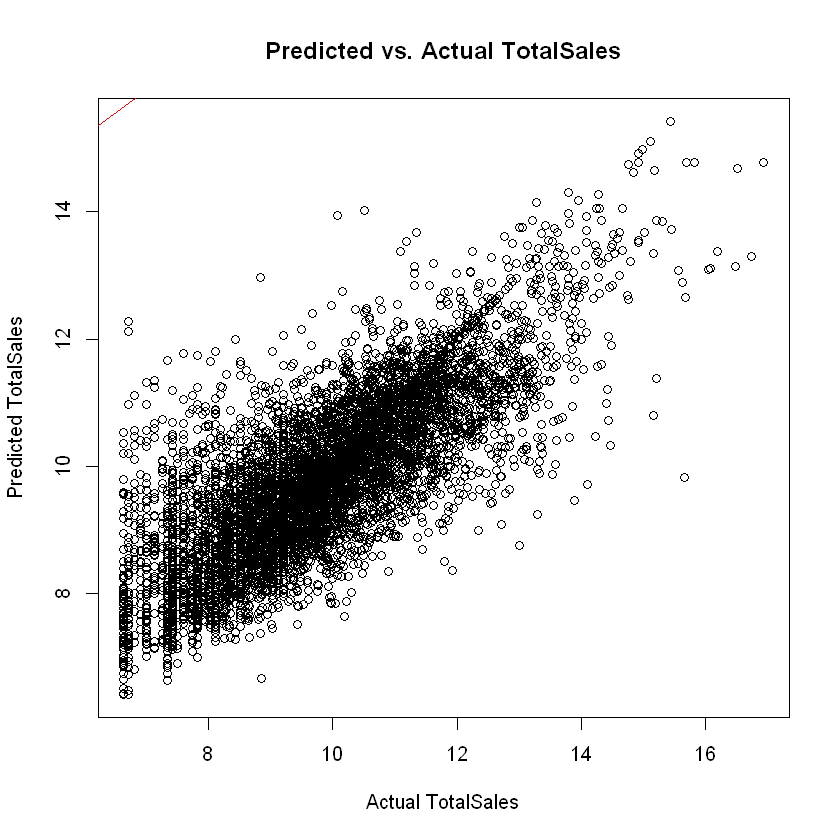

In [25]:
# Model 5 has highest R2 and adjusted R2 score among all the models
# Make predictions using the lm model
predicted_values <- predict(lm_model5, data)

# Create a scatterplot to compare predicted vs actual TotalSales
plot(data$log_transformed_yearly_sales, predicted_values, main = "Predicted vs. Actual TotalSales", 
     xlab = "Actual TotalSales", ylab = "Predicted TotalSales")

# Add the fitted line from the lm model
abline(lm_model5, col = "red")

Try splitting the dataset - and evaluate the errors

In [26]:
########################################################
# Build LM model - split into 70-30 training-testing dataset

# Set a random seed for reproducibility
set.seed(123)

# Split the data into a training set (70%) and a test set (30%)
split <- sample.split(data$log_transformed_yearly_sales, SplitRatio = 0.7)
training_data <- subset(data, split == TRUE)
test_data <- subset(data, split == FALSE)

# Fit a linear regression (lm) model to the training set
lm_model7 = lm(log_transformed_yearly_sales ~ Console + Developer + Genre + ReleaseMonth + ReleaseWeekend, data = training_data)
summary(lm_model7)



Call:
lm(formula = log_transformed_yearly_sales ~ Console + Developer + 
    Genre + ReleaseMonth + ReleaseWeekend, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0954 -0.4818  0.0000  0.5337  5.5132 

Coefficients: (1 not defined because of singularities)
                                                               Estimate
(Intercept)                                                   10.460968
ConsoleDS                                                     -0.033783
ConsoleiOS                                                     0.655377
ConsoleNS                                                      0.900673
ConsolePC                                                      0.045651
ConsolePS2                                                    -0.469631
ConsolePS3                                                     0.399583
ConsolePS4                                                     0.666426
ConsolePS5                                                     

In [27]:
# Make predictions on the test set
predicted_values <- predict(lm_model7, newdata = test_data)

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor Console has new levels Amig, GBA


In [ ]:
## Unable to predict due to developer not covered in the training dataset
# Need to simplify the developer further

Explore grouping Publisher & Developer into Top 25 based on sales revenue

In [28]:
########################################################
# Explore grouping Publisher & Developer into Top 25 based on sales revenue

# Sort the data frame by TotalSales in descending order
data_v2 <- data[order(-data$YearlySales), ]

# Extract the top 25 publishers and developers
top_publishers <- head(unique(data_v2$Publisher), 25)
top_developers <- head(unique(data_v2$Developer), 25)

# View the top 25
print(top_publishers)
print(top_developers)

 [1] "Nintendo"                              
 [2] "PUBG Corporation"                      
 [3] "Coffee Stain Publishing"               
 [4] "Sony Interactive Entertainment"        
 [5] "Capcom"                                
 [6] "Valve"                                 
 [7] "Square Enix"                           
 [8] "Stunlock Studios"                      
 [9] "Rockstar Games"                        
[10] "CD Projekt Red Studio"                 
[11] "Mojang"                                
[12] "Activision"                            
[13] "Newnight"                              
[14] "Warner Bros. Interactive Entertainment"
[15] "EA Sports"                             
[16] "Re_Logic"                              
[17] "Chucklefish"                           
[18] "Electronic Arts"                       
[19] "Facepunch Studios"                     
[20] "PlayStation PC"                        
[21] "Sony Computer Entertainment"           
[22] "Microsoft Studios"          

In [29]:
# Create a function to replace with "Others" if not in the top list
replace_with_others <- function(names, top_names) {
  names[!names %in% top_names] <- "Others"
  return(names)
}

# Replace publishers and developers in the original data frame
data_v2$Publisher <- replace_with_others(data_v2$Publisher, top_publishers)
data_v2$Developer <- replace_with_others(data_v2$Developer, top_developers)


In [30]:
########################################################
# Check the number of distinct values for the variables

sapply(data_v2, function(x) n_distinct(x))

Rank                        Title 
                        7222                         4613 
                     Console                    Publisher 
                          21                           26 
                   Developer                        Genre 
                          26                           13 
                 ReleaseYear               ReleaseQuarter 
                          14                            4 
                ReleaseMonth                  ReleaseWeek 
                          12                           53 
                  ReleaseDay               ReleaseWeekend 
                           7                            2 
                  EndOfMonth                   TotalSales 
                           2                          499 
           YearsSinceRelease                  YearlySales 
                          14                         1246 
log_transformed_yearly_sales 
                        1246

In [31]:
data_v2 = data_v2 %>%
    mutate (
        Publisher = as.factor(Publisher),
        Developer = as.factor(Developer),
        TotalSales = as.numeric(TotalSales)
    )

In [32]:
str(data_v2)

'data.frame':	7222 obs. of  17 variables:
 $ Rank                        : int  25 34 57 3 101 119 2 54 19 195 ...
 $ Title                       : chr  "Pokémon Scarlet / Violet" "The Legend of Zelda: Tears of the Kingdom" "Pokémon Legends: Arceus" "Animal Crossing: New Horizons" ...
 $ Console                     : Factor w/ 21 levels "3DS","Amig","DS",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ Publisher                   : Factor w/ 26 levels "Activision","Bethesda Softworks",..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Developer                   : Factor w/ 26 levels "Bandai Namco Games",..: 6 13 6 13 13 13 14 6 6 7 ...
 $ Genre                       : Factor w/ 13 levels "Action","Action-Adventure",..: 9 2 9 11 10 12 8 9 9 6 ...
 $ ReleaseYear                 : int  2022 2023 2022 2020 2022 2022 2017 2021 2019 2022 ...
 $ ReleaseQuarter              : int  4 4 1 1 3 2 2 4 4 1 ...
 $ ReleaseMonth                : int  11 12 1 3 9 4 4 11 11 3 ...
 $ ReleaseWeek                 : int  47 49 5 12 37

In [40]:
########################################################
# Build LM model - split into 80-20 training-testing dataset

# Set a random seed for reproducibility
set.seed(25)

# Split the data into a training set (80%) and a test set (20%)
split <- sample.split(data_v2$log_transformed_yearly_sales, SplitRatio = 0.8 )
training_data_v2 <- subset(data_v2, split == TRUE)
test_data_v2 <- subset(data_v2, split == FALSE)

In [45]:
# Fit a linear regression (lm) model to the training set
lm_model8 = lm(log_transformed_yearly_sales ~ Console + Publisher + Developer + Genre + ReleaseMonth + ReleaseWeekend, data = training_data_v2)
summary(lm_model8)


Call:
lm(formula = log_transformed_yearly_sales ~ Console + Publisher + 
    Developer + Genre + ReleaseMonth + ReleaseWeekend, data = training_data_v2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0848 -0.8321  0.0000  0.8356  4.6455 

Coefficients: (1 not defined because of singularities)
                                                  Estimate Std. Error t value
(Intercept)                                      9.5494640  0.1738827  54.919
ConsoleAmig                                      2.4394639  1.3367773   1.825
ConsoleDS                                       -0.1283493  0.0887161  -1.447
ConsoleGBA                                       2.9618720  1.3342805   2.220
ConsoleiOS                                       0.5324163  1.3567001   0.392
ConsoleNS                                        0.5758717  0.1046433   5.503
ConsolePC                                        0.6580372  0.0793904   8.289
ConsolePS2                                      -0.7727076  0.2223103  -

In [ ]:
# R2 drops to 38.09%; Adj R2 drop to 37.23%
# All X variables are significant

In [46]:
# Fit a linear regression (lm) model to the training set
lm_model9 = lm(log_transformed_yearly_sales ~ Console + Developer + Genre + ReleaseMonth + ReleaseWeekend, data = training_data_v2)
summary(lm_model9)


Call:
lm(formula = log_transformed_yearly_sales ~ Console + Developer + 
    Genre + ReleaseMonth + ReleaseWeekend, data = training_data_v2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0106 -0.9589 -0.0352  0.9587  5.6984 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       9.17724    0.16507  55.596  < 2e-16 ***
ConsoleAmig                       2.04316    1.45877   1.401 0.161385    
ConsoleDS                        -0.45179    0.09551  -4.730 2.30e-06 ***
ConsoleGBA                        2.38390    1.45603   1.637 0.101630    
ConsoleiOS                        0.56712    1.48068   0.383 0.701723    
ConsoleNS                         0.45645    0.11395   4.006 6.26e-05 ***
ConsolePC                         0.32844    0.08334   3.941 8.21e-05 ***
ConsolePS2                       -1.12884    0.24142  -4.676 2.99e-06 ***
ConsolePS3                        0.39822    0.08834   4.508 6.68e-06 ***
ConsolePS

In [47]:
# Fit a linear regression (lm) model to the training set
lm_model10 = lm(log_transformed_yearly_sales ~ Console + Publisher + Genre  + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = training_data_v2)
summary(lm_model10)


Call:
lm(formula = log_transformed_yearly_sales ~ Console + Publisher + 
    Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = training_data_v2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0466 -0.8523 -0.0183  0.8333  4.4876 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                     10.1976788  0.1301636  78.345
ConsoleAmig                                      2.3189711  1.3504417   1.717
ConsoleDS                                       -0.1137065  0.0893252  -1.273
ConsoleGBA                                       3.1445750  1.3478662   2.333
ConsoleiOS                                       1.5485408  1.3501912   1.147
ConsoleNS                                        0.6728301  0.1038119   6.481
ConsolePC                                        0.6878399  0.0793901   8.664
ConsolePS2                                      -0.6739434  0.2242966  -3.005
ConsolePS3                        

In [48]:
# Make predictions on the test set using log-transformed data
predicted_log_values <- predict(lm_model8, newdata = test_data_v2)

# Convert log-transformed predictions back to the original scale
predicted_values <- exp(predicted_log_values)


In [49]:
# Calculate various error metrics on the original scale
errors <- test_data_v2$YearlySales - predicted_values
sum_of_errors <- sum(errors)
mean_absolute_deviation <- mean(abs(errors))
mean_percentage_error <- mean(errors) * 100  # Already on the original scale
mean_squared_error <- mean(errors^2)
standard_error <- sqrt(mean_squared_error)
mean_absolute_percentage_error <- mean(abs(errors)) * 100

# Print the error metrics
cat("Sum of Errors:", sum_of_errors, "\n")
cat("Mean Absolute Deviation:", mean_absolute_deviation, "\n")
cat("Mean Percentage Error:", mean_percentage_error, "%\n")
cat("Mean Squared Error:", mean_squared_error, "\n")
cat("Standard Error:", standard_error, "\n")
cat("Mean Absolute Percentage Error:", mean_absolute_percentage_error, "%\n")

Sum of Errors: 5900104 
Mean Absolute Deviation: 25425.11 
Mean Percentage Error: 460945.7 %
Mean Squared Error: 5588013505 
Standard Error: 74753.02 
Mean Absolute Percentage Error: 2542511 %


The lm model's performance is not that great - to explore using NN

In [50]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model <- keras_model_sequential()

# Add an input layer
model %>% 
  layer_dense(units = 64, input_shape = c(11), activation = "relu")

# Add one or more hidden layers
model %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 16, activation = "relu")

# Add an output layer
model %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [51]:
summary (model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense (Dense)                      (None, 64)                      768         
 dense_2 (Dense)                    (None, 32)                      2080        
 dense_1 (Dense)                    (None, 16)                      528         
 dense_3 (Dense)                    (None, 1)                       17          
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
________________________________________________________________________________


In [52]:
# Exclude specified columns by selecting all columns except the ones to be excluded
x_train <- training_data_v2[, !names(training_data_v2) %in% c("Rank", "Title", "TotalSales", "YearsSinceRelease", "YearlySales", "log_transformed_yearly_sales")]
x_test <- test_data_v2[, !names(test_data_v2) %in% c("Rank", "Title", "TotalSales", "YearsSinceRelease", "YearlySales", "log_transformed_yearly_sales")]

In [53]:
# Train the model
history = keras::fit(model, data.matrix(x_train), data.matrix(training_data_v2$YearlySales), epochs = 100, batch_size = 100, verbose = 1)

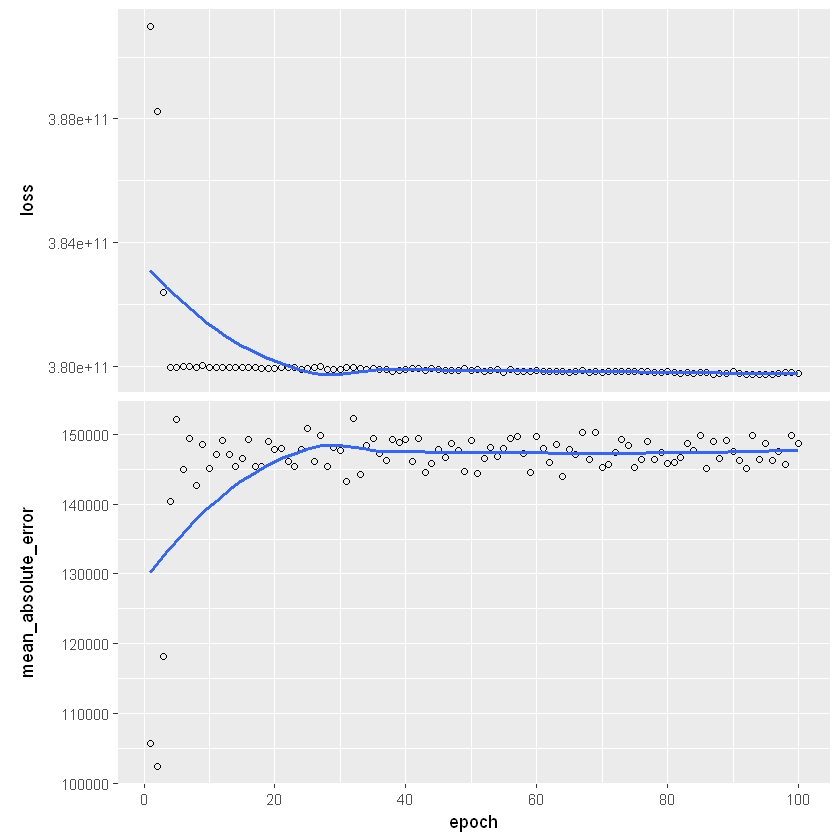

In [54]:
plot(history)

In [55]:
# Evaluate the model
eval_metrics <- model %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$YearlySales)  # Target variable for testing
)

In [56]:
# Print the evaluation metrics
print(eval_metrics)

               loss mean_absolute_error 
       9.980374e+09        8.992808e+04 


In [ ]:
# LM Model: Mean Squared Error: 5900104  & Mean Absolute Deviation: 25425.11
# NN Model: loss: ard 10 & mean_absolute_error: ard 9
# NN Model is of better predictor!

In [60]:
# Generate predictions using your trained model
predictions <- model %>% predict(data.matrix(x_test))

# Organize results into a data frame
results <- data.frame(Actual_YearlySales = test_data_v2$YearlySales, Predicted_YearlySales = as.vector(predictions))

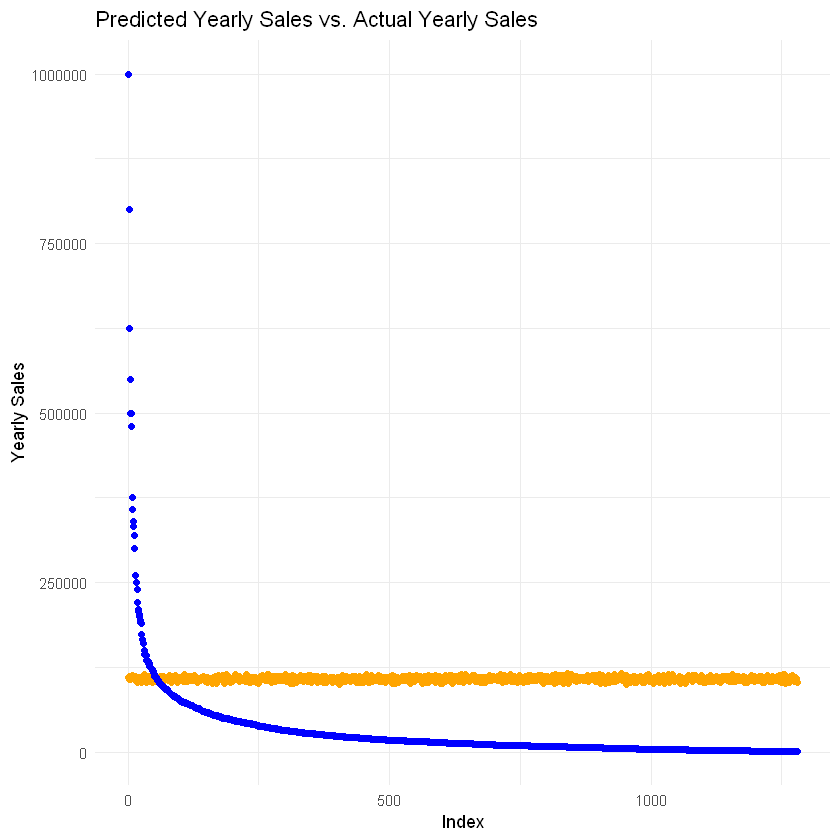

In [59]:
# Create a scatter plot for both predicted and actual values using different colors
ggplot(results, aes(x = seq_along(Actual_YearlySales))) +
  geom_point(aes(y = Predicted_YearlySales), color = "orange") +
  geom_point(aes(y = Actual_YearlySales), color = "blue") +
  labs(x = "Index", y = "Yearly Sales") +
  ggtitle("Predicted Yearly Sales vs. Actual Yearly Sales") +
  theme_minimal()

In [120]:
# Export to excel

write_xlsx(results, path = "NN_results.xlsx")

In [64]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model2 <- keras_model_sequential()

# Add an input layer
model2 %>% 
  layer_dense(units = 72, input_shape = c(11), activation = "relu")

# Add one or more hidden layers
model2 %>%
  layer_dense(units = 50, activation = "relu") %>%
  layer_dense(units = 8, activation = "relu")

# Add an output layer
model2 %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model2 %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [65]:
summary(model2)

Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_8 (Dense)                    (None, 72)                      864         
 dense_10 (Dense)                   (None, 50)                      3650        
 dense_9 (Dense)                    (None, 8)                       408         
 dense_11 (Dense)                   (None, 1)                       9           
Total params: 4,931
Trainable params: 4,931
Non-trainable params: 0
________________________________________________________________________________


In [66]:
# Train the model
history2 = keras::fit(model2, data.matrix(x_train), data.matrix(training_data_v2$YearlySales), epochs = 100, batch_size = 100, verbose = 1)

In [67]:
# Evaluate the model
eval_metrics2 <- model2 %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$YearlySales)  # Target variable for testing
)

In [68]:
# Print the evaluation metrics
print(eval_metrics2)

               loss mean_absolute_error 
       1.024168e+10        9.142907e+04 


In [ ]:
# Increasing the hyperparameter reduce the loss further

In [69]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model3 <- keras_model_sequential()

# Add an input layer
model3 %>% 
  layer_dense(units = 64, input_shape = c(11), activation = "relu")

# Add one or more hidden layers
model3 %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 16, activation = "relu")

# Add an output layer
model3 %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model3 %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [70]:
# Train the model
history3 = keras::fit(model3, data.matrix(x_train), data.matrix(training_data_v2$YearlySales), epochs = 500, batch_size = 100, verbose = 1)

In [71]:
# Evaluate the model
eval_metrics3 <- model3 %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$YearlySales)  # Target variable for testing
)

In [72]:
# Print the evaluation metrics
print(eval_metrics3)

               loss mean_absolute_error 
       1.459941e+10        9.184043e+04 


In [ ]:
# Increasing number of iterations improves the model's performance too

In [73]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model4 <- keras_model_sequential()

# Add an input layer
model4 %>% 
  layer_dense(units = 64, input_shape = c(11), activation = "relu")

# Add one or more hidden layers
model4 %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 16, activation = "relu")

# Add an output layer
model4 %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model4 %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [74]:
# Train the model
history4 = keras::fit(model4, data.matrix(x_train), data.matrix(training_data_v2$YearlySales), epochs = 200, batch_size = 100, verbose = 1)

In [75]:
# Evaluate the model
eval_metrics4 <- model4 %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$YearlySales)  # Target variable for testing
)

In [76]:
# Print the evaluation metrics
print(eval_metrics4)

               loss mean_absolute_error 
       1.031032e+10        9.159532e+04 


In [77]:
# Generate predictions using your trained model
predictions_NN4 <- model4 %>% predict(data.matrix(x_test))

# Organize results into a data frame
results_NN4 <- data.frame(Actual_YearlySales = test_data_v2$YearlySales, Predicted_YearlySales = as.vector(predictions_NN4))

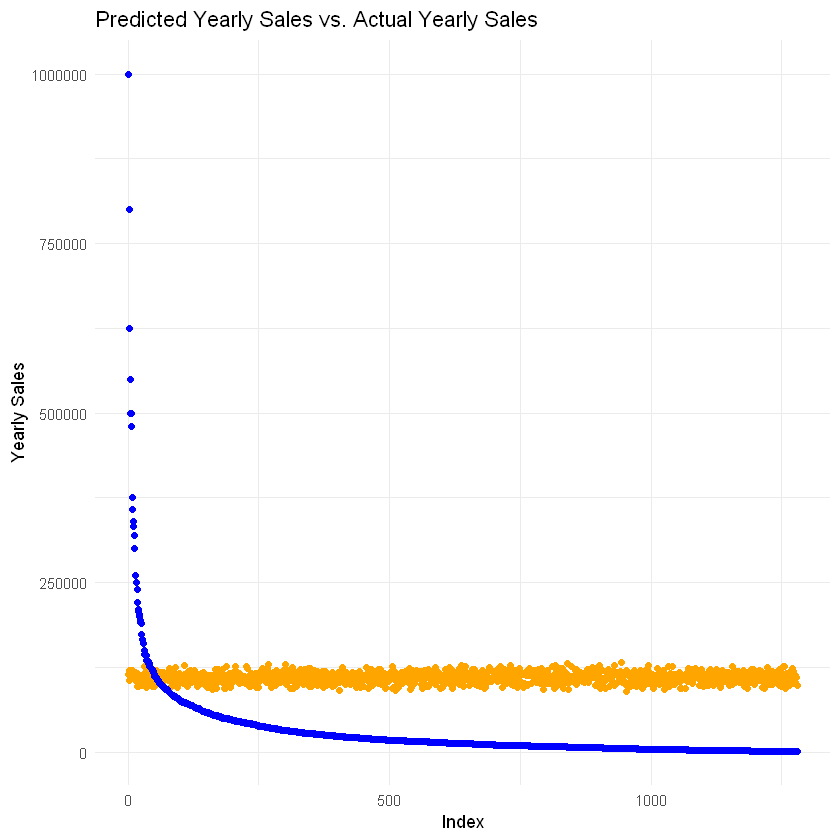

In [78]:
# Create a scatter plot for both predicted and actual values using different colors
ggplot(results_NN4, aes(x = seq_along(Actual_YearlySales))) +
  geom_point(aes(y = Predicted_YearlySales), color = "orange") +
  geom_point(aes(y = Actual_YearlySales), color = "blue") +
  labs(x = "Index", y = "Yearly Sales") +
  ggtitle("Predicted Yearly Sales vs. Actual Yearly Sales") +
  theme_minimal()